In [85]:
# Dependencies
import requests
from pprint import pprint
from config import vic_key
import json
import pandas as pd
import matplotlib.pyplot as plt

url = "https://api.vic.gov.au:443/abs/v1.0/labour-force-statistics?"

In [36]:
# Search for articles that mention granola
params = {
'region': "AUSTRALIA",
'data_item': "UNEMPLOYMENT_RATE",
'age': "15_AND_OVER",
'start_period': "2018-01",
'end_period': "2020-12"
}

In [30]:
headers = {
  "Content-Type": "application/json",
  "Accept": "application/json",
  "apikey": vic_key
}

In [37]:
# Request data
response = requests.get(url, headers = headers, params = params)
# Converting the response to JSON, and printing the result.
data = response.json()
pprint(data)

{'_links': [{'href': '/abs/v1.0/labour-force-statistics?age=15_AND_OVER&data_item=UNEMPLOYMENT_RATE&end_period=2020-12&region=AUSTRALIA&start_period=2018-01&page=1&limit=1000',
             'rel': 'self'},
            {'href': '/abs/v1.0/labour-force-statistics?age=15_AND_OVER&data_item=UNEMPLOYMENT_RATE&end_period=2020-12&region=AUSTRALIA&start_period=2018-01&page=1&limit=1000',
             'rel': 'first'},
            {'href': '/abs/v1.0/labour-force-statistics?age=15_AND_OVER&data_item=UNEMPLOYMENT_RATE&end_period=2020-12&region=AUSTRALIA&start_period=2018-01&page=1&limit=1000',
             'rel': 'last'}],
 '_meta': {'count': 324,
           'limit': 1000,
           'page': 1,
           'response_time': '0.376 seconds',
           'response_time_ms': 376,
           'total_records': 324},
 'labour_force_statistics': [{'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description': 

                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2018-05',
                              'observation_value': '5.3860882',
                              'region_description': 'Australia',
                              'sex_description': 'Females'},
                             {'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2018-06',
                              'observation_value': '5.005769',
                              'region_description': 'Australia',
                              'sex_description': 'Females'},
                             {'adjustment_type_description': 'Original',
                              'age_description': '15 and over',

                              'observation_value': '6.6733713',
                              'region_description': 'Australia',
                              'sex_description': 'Females'},
                             {'adjustment_type_description': 'Seasonally '
                                                             'Adjusted',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2020-10',
                              'observation_value': '7.0154976',
                              'region_description': 'Australia',
                              'sex_description': 'Females'},
                             {'adjustment_type_description': 'Seasonally '
                                                             'Adjusted',
                              'age_description': '15 and over',
                              'data_item_description':

                             {'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2020-04',
                              'observation_value': '6.4127395',
                              'region_description': 'Australia',
                              'sex_description': 'Persons'},
                             {'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2020-05',
                              'observation_value': '6.9083971',
                              'region_description': 'Australia',
                              'sex_description': 'Persons'},
                             {'adjustment_type_description': '

In [78]:
data1 = data['labour_force_statistics']

In [79]:
unemployment_aus_df = pd.DataFrame(data1)
clean_unemployment_aus_df = unemployment_aus_df[unemployment_aus_df.observation_value != 'NaN']
clean_unemployment_aus_df

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
0,Australia,Unemployment rate (%),Males,15 and over,Original,2018-01,5.8914575
1,Australia,Unemployment rate (%),Males,15 and over,Original,2018-02,5.8682949
2,Australia,Unemployment rate (%),Males,15 and over,Original,2018-03,5.7280693
3,Australia,Unemployment rate (%),Males,15 and over,Original,2018-04,5.5032532
4,Australia,Unemployment rate (%),Males,15 and over,Original,2018-05,5.2036866
...,...,...,...,...,...,...,...
283,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-08,6.8046981
284,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-09,6.9095718
285,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-10,6.9803063
286,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-11,6.817515


In [80]:
clean_unemployment_aus_df.dtypes

region_description             object
data_item_description          object
sex_description                object
age_description                object
adjustment_type_description    object
observation_month              object
observation_value              object
dtype: object

In [82]:
unemp = clean_unemployment_aus_df.observation_value.astype(float)

In [83]:
unemp

0      5.891457
1      5.868295
2      5.728069
3      5.503253
4      5.203687
         ...   
283    6.804698
284    6.909572
285    6.980306
286    6.817515
287    6.589865
Name: observation_value, Length: 216, dtype: float64

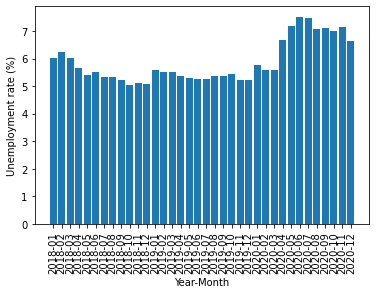

In [90]:
date = clean_unemployment_aus_df.observation_month
plt.bar(date, unemp)
plt.xticks(rotation = 90)
plt.title("")
plt.xlabel("Year-Month")
plt.ylabel("Unemployment rate (%)")
plt.show()